In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs

% matplotlib inline

In [2]:
X, y = make_blobs(centers=4, n_samples=1000)
print(f'Shape of dataset: {X.shape}')

Shape of dataset: (1000, 2)


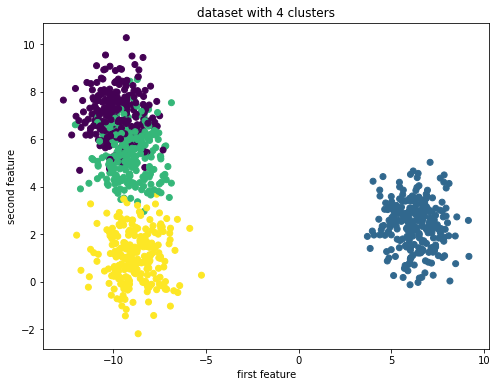

In [3]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('dataset with 4 clusters')
plt.xlabel('first feature')
plt.ylabel('second feature')
plt.show()

In [5]:
X.shape

(1000, 2)

In [51]:
class KMeans():
    def __init__(self,n_clusters =4):
        self.k = n_clusters
    def fit(self,data):
        n_samples,_ = data.shape
        self.centers = np.array(random.sample(list(data),self.k))
        self.initial_centers = np.copy(self.centers)
        
        old_assigns = None
        n_iter=0
        while True:
            new_assigns =[self.classify(datapoint) for datapoint in data]
            if new_assigns == old_assigns:
                print(f"no of iterations is{n_iter}")
                return
            old_assigns = new_assigns
            n_iter+=1
            
            for id_ in range(self.k):
                points = np.where(np.array(new_assigns) == id_)
                datapoints = data[points]
                self.centers[id_] = datapoints.mean(axis =0)
    def l2_distance(self, datapoint):
        dists = np.sqrt(np.sum((self.centers - datapoint)**2, axis=1))
        return dists
    
    def classify(self, datapoint):
        """
        Given a datapoint, compute the cluster closest to the
        datapoint. Return the cluster ID of that cluster.
        """
        dists = self.l2_distance(datapoint)
        return np.argmin(dists)
    
    def plot_clusters(self, data):
        plt.figure(figsize=(12,10))
        plt.title("Initial centers in black, final centers in red")
        plt.scatter(data[:, 0], data[:, 1], marker='.', c=y)
        plt.scatter(self.centers[:, 0], self.centers[:,1], c='r')
        plt.scatter(self.initial_centers[:, 0], self.initial_centers[:,1], c='k')
        plt.show()
 

In [52]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

no of iterations is10


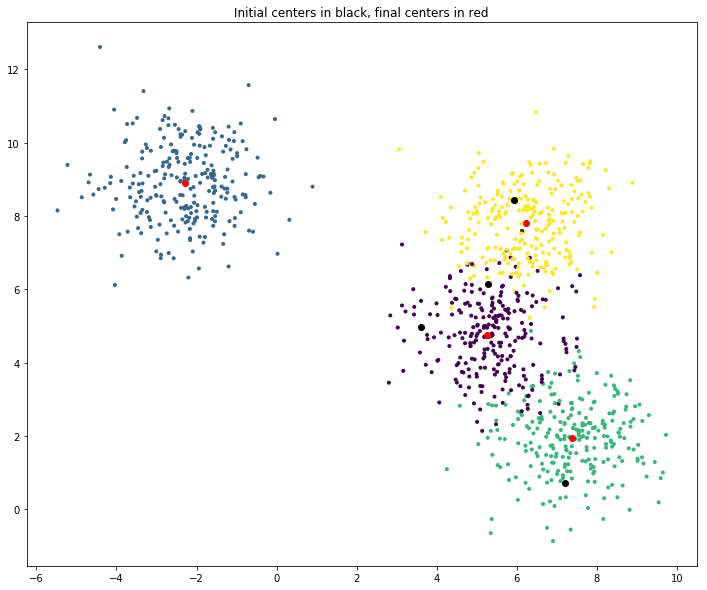

In [53]:
kmeans.plot_clusters(X)

